In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = "./AmesHousing.csv"
df = pd.read_csv(filepath_or_buffer=filename, sep=',', header=0, index_col=None)

df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


#num_features 37
['PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


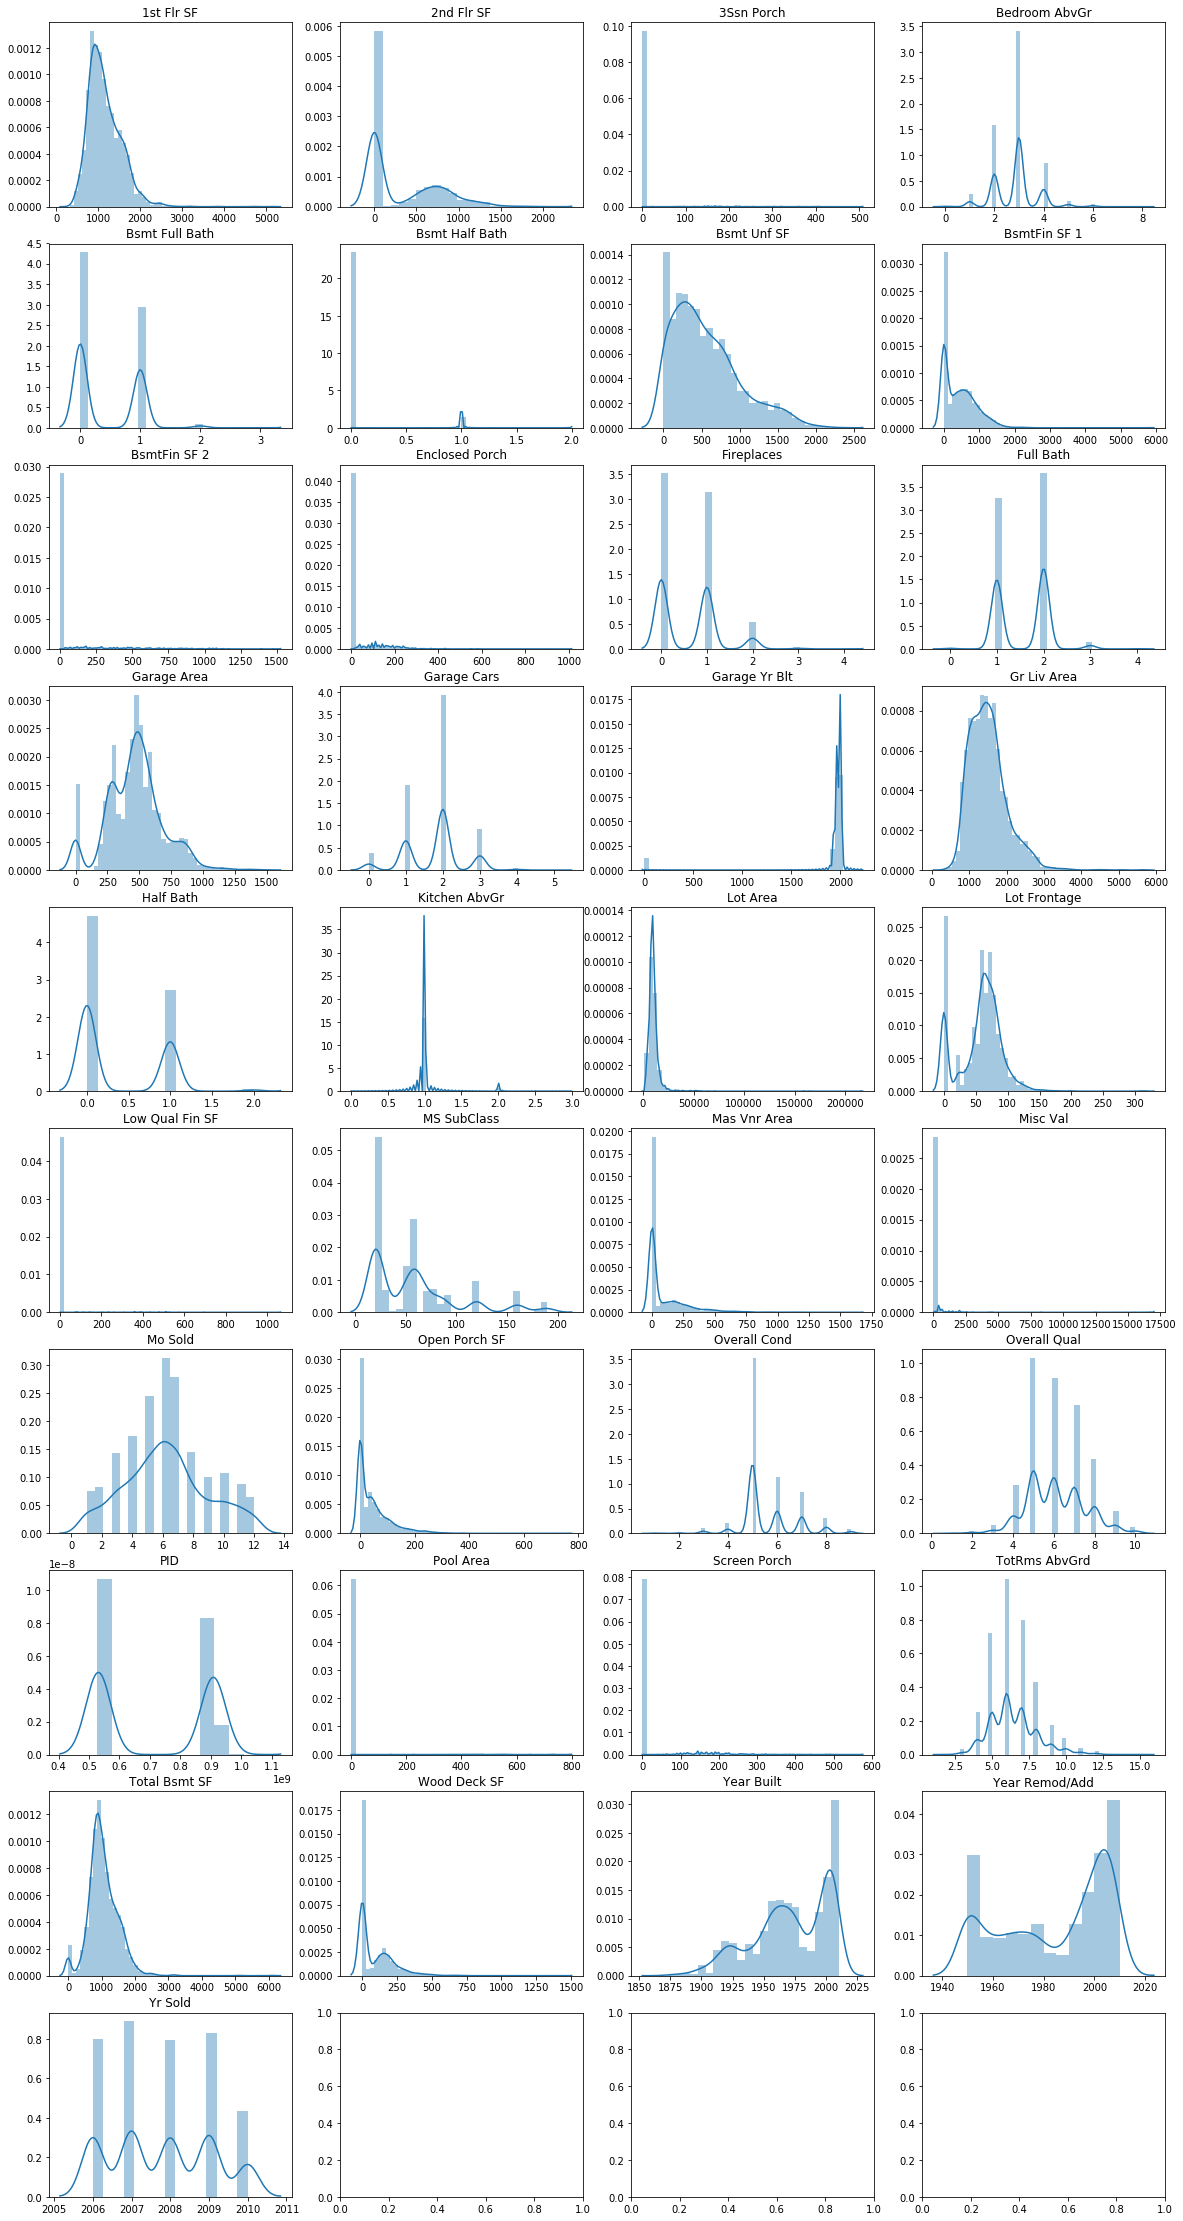

In [3]:
def distribution(df, num_features):
    # method 1: FacetGrid + map
#     f = pd.melt(df, value_vars=sorted(num_features))
#     g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
#     g = g.map(sns.distplot, 'value')

    # for loop
    fig, axes = plt.subplots(nrows=int((len(num_features)-1)/4+1), ncols=4, figsize=(20, 40))
    for i, feature in enumerate(sorted(num_features)):
        sns.distplot(df[feature].values, ax=axes[int(i/4), i%4]).set_title(feature)
    
def get_feature_groups(df):
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_features = df.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_features = df.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)

def profiling(df):
    print(num_features)
    # draw distribution
    distribution(df, num_features)

    # regression
#     regression(df, num_features)
    

df = df.fillna(0)
num_features, cat_features = get_feature_groups(df)
print("#num_features", len(num_features))
profiling(df)

In [4]:
num_features.remove("PID")
print(num_features)

['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold']


/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


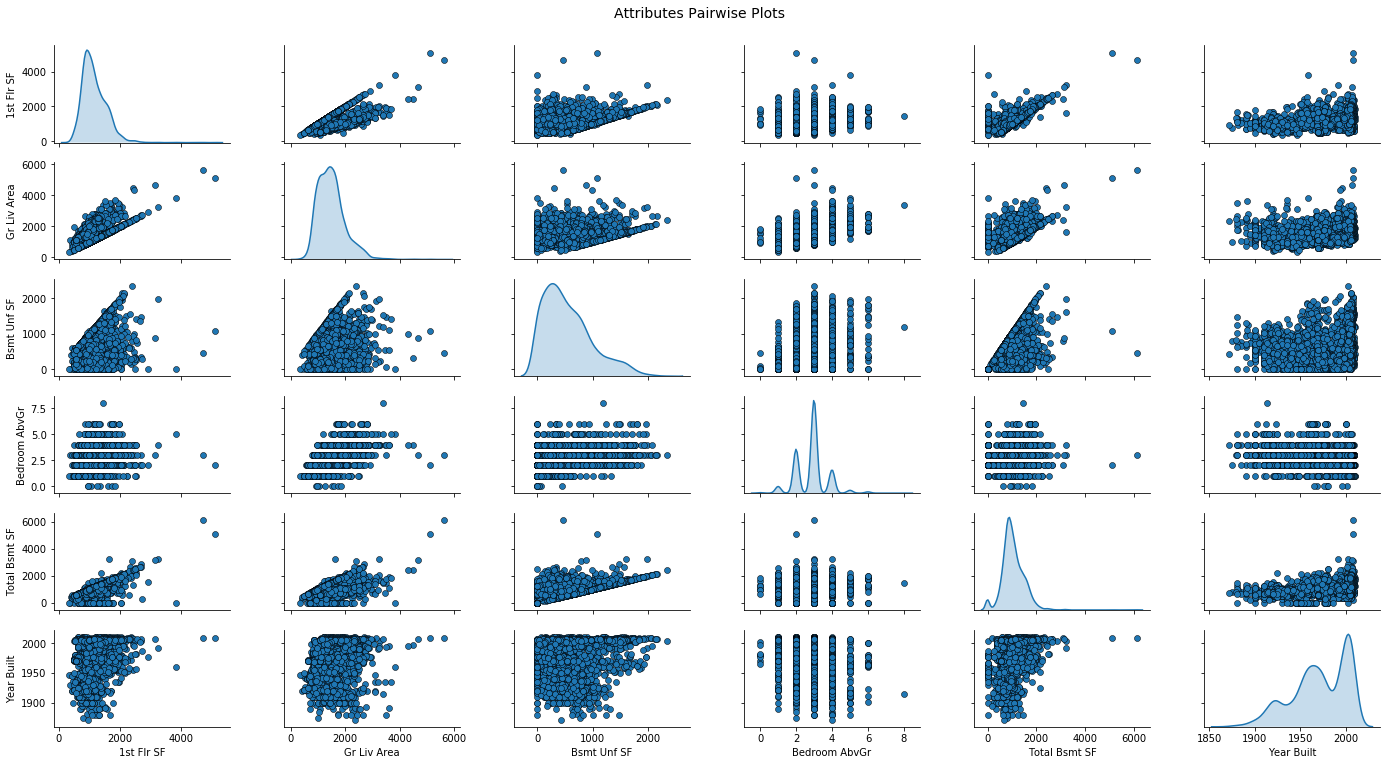

In [5]:
# 1. Pandas libaray
# from pandas.plotting import scatter_matrix
# fig = scatter_matrix(df[['1st Flr SF', 'Gr Liv Area', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Total Bsmt SF', 'Year Built']], alpha=0.2, figsize=(6, 6), diagonal='kde')

# 2. Seaborn
cols = ['1st Flr SF', 'Gr Liv Area', 'Bsmt Unf SF', 'Bedroom AbvGr', 'Total Bsmt SF', 'Year Built']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Attributes Pairwise Plots', fontsize=14)


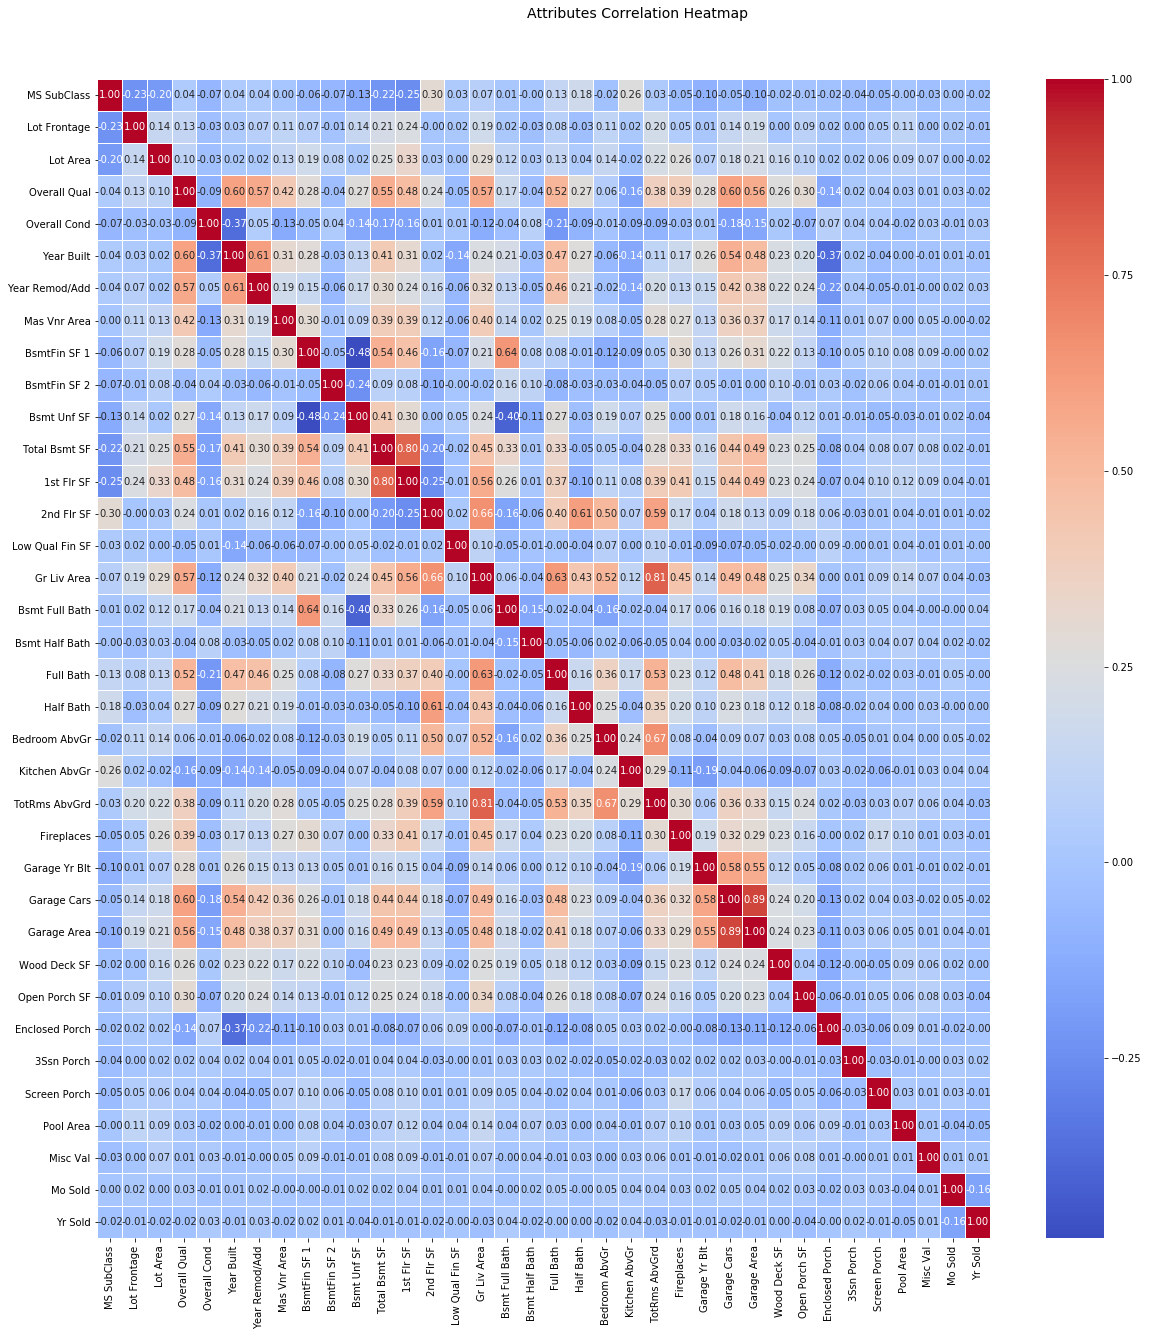

In [6]:
f, ax = plt.subplots(figsize=(20, 20))
corr = df[num_features].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Attributes Correlation Heatmap', fontsize=14)

## Dimension Reduction

In [7]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Principal Component Analysis (PCA)

In [8]:
result_pca = PCA(n_components=2).fit_transform(df[num_features].values)

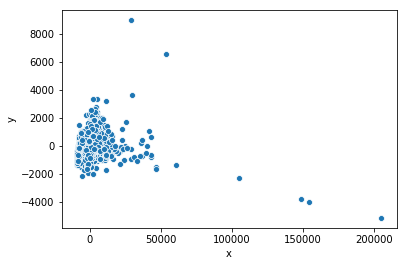

In [9]:
pca_df = pd.DataFrame(data=result_pca, columns=['x','y'])
sns.scatterplot(x="x", y="y", data=pca_df)

In [10]:
result_tsne = TSNE(n_components=2).fit_transform(df[num_features].values)

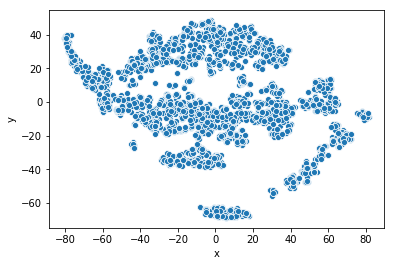

In [11]:
tsne_df = pd.DataFrame(data=result_tsne, columns=['x','y'])
sns.scatterplot(x="x", y="y", data=tsne_df)

## Scalar (Preprocessing)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[num_features].values)
scaled = scaler.transform(df[num_features].values)

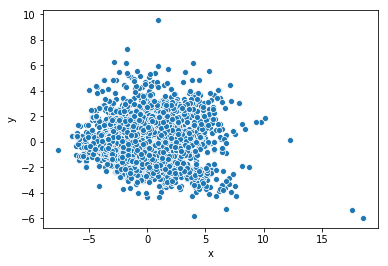

In [14]:
result_pca2 = PCA(n_components=2).fit_transform(scaled)
pca_df2 = pd.DataFrame(data=result_pca2, columns=['x','y'])
sns.scatterplot(x="x", y="y", data=pca_df2)

In [ ]:
result_tsne2 = TSNE(n_components=2).fit_transform(scaled)

tsne_df2 = pd.DataFrame(data=result_tsne2, columns=['x','y'])
sns.scatterplot(x="x", y="y", data=tsne_df2)

## Clustering

In [ ]:
from sklearn import cluster

In [ ]:
dbscan = cluster.DBSCAN(eps=3, min_samples=7).fit(scaled)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

labels = ["L"+str(x) for x in dbscan.labels_]
pca_df2['label'] = labels
tsne_df2['label'] = labels

sns.scatterplot(x='x', y='y', data=pca_df2, ax=axes[0], hue='label').set_title('PCA')
sns.scatterplot(x='x', y='y', data=tsne_df2, ax=axes[1], hue='label').set_title('t-sne')


In [ ]:
kmeans = cluster.KMeans(n_clusters=3).fit(scaled)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

km_labels = ["L"+str(x) for x in kmeans.labels_]
pca_df2['label'] = km_labels
tsne_df2['label'] = km_labels

sns.scatterplot(x='x', y='y', data=pca_df2, ax=axes[0], hue='label').set_title('PCA')
sns.scatterplot(x='x', y='y', data=tsne_df2, ax=axes[1], hue='label').set_title('t-sne')


In [ ]:
sns.color_palette("Paired")

In [ ]:
from pandas.plotting import parallel_coordinates

to_plot = pd.DataFrame(data=scaled, columns=num_features)
to_plot['label'] = km_labels


fig, ax = plt.subplots(figsize=(20,5))
ax.set_xticklabels(labels=to_plot.columns, rotation=30)

parallel_coordinates(to_plot, "label", color=sns.color_palette("Paired"))